<a href="https://colab.research.google.com/github/pbrugierewebsite/QPM_Templates/blob/main/BookListing7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Var 99% is: -0.07792614309318294


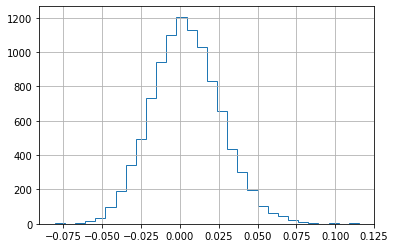

In [1]:
# First part: data extraction
import pandas as pd
import pandas_datareader.data as web
Tickers = ['DPW.DE','ALV.DE','BMW.DE','BAS.DE','FME.DE']
startinput = '2017-01-1'
endinput = '2017-12-31'
S = pd.DataFrame() # creation of the data frame that will contain the data set
for t in Tickers : 
    S[t] = web.DataReader(name = t, data_source='yahoo',start= startinput,end= endinput)['Close']
# Second part: BHS VaR calculation for the portfolio
import numpy as np
import matplotlib.pyplot as plt
# we want to calculate the VaR of the portfolio returns over p days 
# for this, we produce s simulations for the portfolio returns over p days
# this is done through the bootstrap,
# by choosing with replacement p vectors of stocks returns amongst the n calculated.
d = len(Tickers) # number of stocks considered
p = 10 # number of daily returns considered in each bootstrap simulation
s = 10000 # number of bootstrap simulations
R = pd.DataFrame() # creation of the data frame that will contain the five stocks returns

for t in Tickers : 
    R[t] =S[t]/S[t].shift(1)-1 # calculate the stock returns from the closing prices observed
R = R[1:]  # eliminate the first value which cannot be calculated

# definition of the weights for the portfolio
w = np.zeros(d) # defines the shape of the vector of allocation 
for i in range(d):
    w[i]= 1.0/d # arbitray choice of constant weights for the portfolio in this example

# bootstrap method used in each of the s simulations
n = len(R.index) # number of vector of returns from the sample 
perf = np.zeros(s) # array where the portfolio return is saved for each simulation
for i in range(s):
    idx = np.random.choice(n, p) # select with replacement p vectors of returns amongst n
    RB = R.iloc[idx]  # extract the p vectors of returns from the return data frame
    RBP = np.prod(RB +1)-1 # calculate the returns over p days for each stock
    perf[i] = RBP.dot(w) # calculate the portfolio return over p days
plt.hist(perf, 30, histtype='step') # histogram for the portfolio return with 30 buckets
plt.grid(True) # grid added to the histogram
print ("The Var 99% is:", np.percentile(perf,0.01))